# Metin Temsili (Text Representation)
- Metin temsili ,bir metni sayısal veya başka türde bir formatta temsil etme işlemidir.


- Bag of Words (BoW)
- TF -IDF (Term frequency-nverse document frequency)
- N-Gram modelleri 
- Word Embeddings
- Transformer Tabanlı Metinli Temsili 


# Bag of Words 
Bag of Words (BoW), metin verisi üzerinde kullanılan bir özellik çıkarım (feature extraction) yöntemidir. Bu yaklaşım, metindeki kelimeleri bir torba (bag) gibi ele alır ve kelimelerin sırasına ya da gramatikal yapılarına bakmaz. Sadece hangi kelimelerin metinde geçtiği ve her birinin ne kadar sıklıkla kullanıldığı dikkate alınır.

## Kelime Sayımı (Word Count):
BoW, her kelimenin metin içinde kaç defa geçtiğini sayarak bir özellik (feature) vektörü oluşturur. Bu vektör, her kelimenin bir sayısı ile temsil edilir.

- Örnek:

    - Diyelim ki elimizde şu iki cümle var:

        - Cümle 1: "Kediler çok sevimli."
        - Cümle 2: "Kediler çok hızlı koşuyor."
        - Bu cümlelerden bir kelime kümesi (vocabulary) oluşturulur:  -  ["Kediler", "çok", "sevimli", "hızlı", "koşuyor"]

    BoW temelli özellik vektörleri şöyle olur:

    Cümle 1: [1, 1, 1, 0, 0]
    Cümle 2: [1, 1, 0, 1, 1]
    Her bir sayının anlamı, o kelimenin metinde kaç kere geçtiğidir.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "Kedi evde",
    "Kedi bahçede"
]
vectorizer = CountVectorizer()
# metin -> sayisal vektor
x= vectorizer.fit_transform(documents)

In [3]:
print("Kelime kumesi: ", vectorizer.get_feature_names_out())

Kelime kumesi:  ['bahçede' 'evde' 'kedi']


In [4]:
print("vector temsili : ",x.toarray())

vector temsili :  [[0 1 1]
 [1 0 1]]


# Note:
### Temel Regex Söz Dizimi (Syntax)
Regex ifadeleri belirli kurallara dayanır ve metin içinde desen aramak için kullanılır. Regex ifadelerinde kullanılan bazı yaygın semboller ve anlamları şunlardır:

1.1 Karakter Sınıfları (Character Classes)
- \d: Rakam (0-9) - herhangi bir dijital karakteri temsil eder.
- \D: Rakam olmayan karakter (herhangi bir harf, sembol vb.).
- \w: "Word" (kelime karakteri) - harfler (a-z, A-Z), rakamlar (0-9) ve alt çizgi (_) içerir.
- \W: Kelime olmayan karakterler (boşluklar, noktalama işaretleri, vb.).
- \s: Boşluk karakteri (boşluk, tab, yeni satır, vb.).
- \S: Boşluk olmayan karakter.
- \b: Kelime sınırı (bir kelimenin başlangıcı ya da sonu).
- \B: Kelime sınırı olmayan bir yer.


# Working on Real data set 
- Please check  kaggle - https://www.kaggle.com/code/zehranurmangal/learning-bag-of-words


# TF-IDF (Term Frequency-Inverse Document Frewuency)
- Metin madenciliğinde ve bilgi erişiminde sıkça kullanılan bir özellik çıkarım yöntemidir.
- kelimelerin belgeler içinde ne kadar önemli olduğunu belirlemek için kullanılır

- Term Frequency : Bir kelimenin bir belgede ne kadar sık geçtiğini ölçer
- Bir kelimenin tüm belgelerdeki yaygınlığını ölçer .Bir kelimenin çok belgede geçiyorsa o kelime çok fazla bilgi sağlamaz




![Resim](images/image1.png)



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 
import numpy as np 


In [14]:
documents = [ 
            "Kedi çok tatlı bir hayvandır ",
            "Kedi ve köpekler çok tatlı hayvanlardır",
            "Arılar bal üretir"]

In [15]:
tfidf_vectorizer=TfidfVectorizer()

#metinler -> sayısal 
X = tfidf_vectorizer.fit_transform(documents)

feature_names = tfidf_vectorizer.get_feature_names_out()

In [16]:
print(feature_names)

['arılar' 'bal' 'bir' 'hayvandır' 'hayvanlardır' 'kedi' 'köpekler' 'tatlı'
 've' 'çok' 'üretir']


In [17]:
print("TF-IDF vektor temsilleri: ")
vektor_temsili = X.toarray()
print(vektor_temsili)

TF-IDF vektor temsilleri: 
[[0.         0.         0.51741994 0.51741994 0.         0.3935112
  0.         0.3935112  0.         0.3935112  0.        ]
 [0.         0.         0.         0.         0.45954803 0.34949812
  0.45954803 0.34949812 0.45954803 0.34949812 0.        ]
 [0.57735027 0.57735027 0.         0.         0.         0.
  0.         0.         0.         0.         0.57735027]]


In [18]:
df_tf_ıdf = pd.DataFrame(vektor_temsili,columns=feature_names)
print(df_tf_ıdf)

    arılar      bal      bir  hayvandır  hayvanlardır      kedi  köpekler  \
0  0.00000  0.00000  0.51742    0.51742      0.000000  0.393511  0.000000   
1  0.00000  0.00000  0.00000    0.00000      0.459548  0.349498  0.459548   
2  0.57735  0.57735  0.00000    0.00000      0.000000  0.000000  0.000000   

      tatlı        ve       çok   üretir  
0  0.393511  0.000000  0.393511  0.00000  
1  0.349498  0.459548  0.349498  0.00000  
2  0.000000  0.000000  0.000000  0.57735  


In [19]:
arilat_tfıdf=df_tf_ıdf["arılar"]
arilat_mean_tfıdf = np.mean(arilat_tfıdf) 

In [20]:
print(arilat_mean_tfıdf)

0.19245008972987523


# Working on real data set
Please check -> https://www.kaggle.com/code/zehranurmangal/learning-tf-idf


# N-Gram Modelleri
- Bir dil modelinde kullanılan kelime veya karakter dizisinin uzunluğunu belirten bir terimdir
- Uni GRam 1-1 ayırır , Bi Gram olursa 2-2 ayırır cümleyi 
- Örnek ['bu bir örnek veridir']
- Unigram : ['bu','bir','örnek','veridir']
- Bi Gram : ['bu bir','örnek veridir']

### Kullanım alanları
- Metin Modelleme
- Metin sınıflandırma 
- Metin üretimi 
- Metin Benzerliği


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
documents = [
    "Bu bir örnek metindir",
    "bu örnek metin dogal dil işlemeyi gösterir."
]

In [25]:
#Unigram , bi gram ve trigram ->countvectorizer
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))

In [27]:
X_unigram = vectorizer_unigram.fit_transform(documents)
unigram_features = vectorizer_unigram.get_feature_names_out()

In [28]:
print(unigram_features)

['bir' 'bu' 'dil' 'dogal' 'gösterir' 'işlemeyi' 'metin' 'metindir' 'örnek']


In [29]:
X_bigram = vectorizer_bigram.fit_transform(documents)
bigram_features = vectorizer_bigram.get_feature_names_out()
print(bigram_features)

['bir örnek' 'bu bir' 'bu örnek' 'dil işlemeyi' 'dogal dil'
 'işlemeyi gösterir' 'metin dogal' 'örnek metin' 'örnek metindir']


In [30]:
X_trigram = vectorizer_trigram.fit_transform(documents)
trigram_features = vectorizer_trigram.get_feature_names_out()
print(trigram_features)

['bir örnek metindir' 'bu bir örnek' 'bu örnek metin'
 'dil işlemeyi gösterir' 'dogal dil işlemeyi' 'metin dogal dil'
 'örnek metin dogal']


# Word Embeddings 
- Kelime gömme ,nlp ve makine öğreniminde kullanılan bir tekniktir,
kelimeleri genellikle sürekli bir vektör uzayında anlamlı temsil edecek şekilde sayısal vektörlere dönüştürür
- Bu temsiller ,kelimeler arasındkai anlamsal ve dilbilgisel ilişkileri yakalamayı hedefler

In [18]:
"""
    word embedding 
    1) Word2Vec (Google)
    2) FastText (Facebook)
""" 

'\n    word embedding \n    1) Word2Vec (Google)\n    2) FastText (Facebook)\n'

In [19]:
import pandas as pd 
from gensim.models import Word2Vec , FastText
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


In [20]:
# example data 
sentences = [
    "Kedi çok tatlı bir hayvandır",
    "Köpekler evcil hayvanlardır.",
    "Kediler Genellikle bağımsızdır.",
    "Köpekler sadık ve dost canlısıdır.",
    "Hayvanlar insanlar için iyi arkadaşlardır."
]

In [21]:
tokinezed_sentences = [simple_preprocess(sentence) for sentence in sentences]

In [22]:
tokinezed_sentences

[['kedi', 'çok', 'tatlı', 'bir', 'hayvandır'],
 ['köpekler', 'evcil', 'hayvanlardır'],
 ['kediler', 'genellikle', 'bağımsızdır'],
 ['köpekler', 'sadık', 've', 'dost', 'canlısıdır'],
 ['hayvanlar', 'insanlar', 'için', 'iyi', 'arkadaşlardır']]

In [23]:
#word2vec
word2vec_model = Word2Vec(sentences=tokinezed_sentences,vector_size=50,window=5,min_count=1,sg=0)

# Sentences:Verdiğimiz veriler
# Vector_size :Daha büyük sizeler daha fazla anlam sağlayabilir
# Window = Bir kelimenin çevresinde kaç tane kelimenin dikkate alınacağı belirliyor
# min_count = dikkate alacağı kelimelerin frekansını belirliyor,mesela kelimeden bir tane var ise onu dikkate almayacak
# sg :modelin hangi öğrenme algoritmasını kullanacağını söylüyor 
# sg=0 : bagof word, sg=1:ngram algortması





In [24]:
fasttext_model = FastText(sentences=tokinezed_sentences,vector_size=50,window=5,min_count=1,sg=0)


In [33]:
%matplotlib inline


def plot_word_embeddings(model,title):
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words ]
    
    #PCA 
    pca =PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)
    
    # 3d görselleştirme
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111,projection="3d")
    
    
    # vektörleri çizelim 
    ax.scatter(reduced_vectors[:,0],reduced_vectors[:,1],reduced_vectors[:,2])
    
    # kelime etiketle
    for i, word in enumerate(words):
        ax.text(reduced_vectors[i,0],reduced_vectors[i,1],reduced_vectors[i,2],word,fontsize=12)
    
    
    ax.set_title(title)
    
    ax.set_xlabel("Component 1 ")
    ax.set_ylabel("Component 2 ")
    ax.set_zlabel("Component 3 ")
    
    plt.show()
    
    


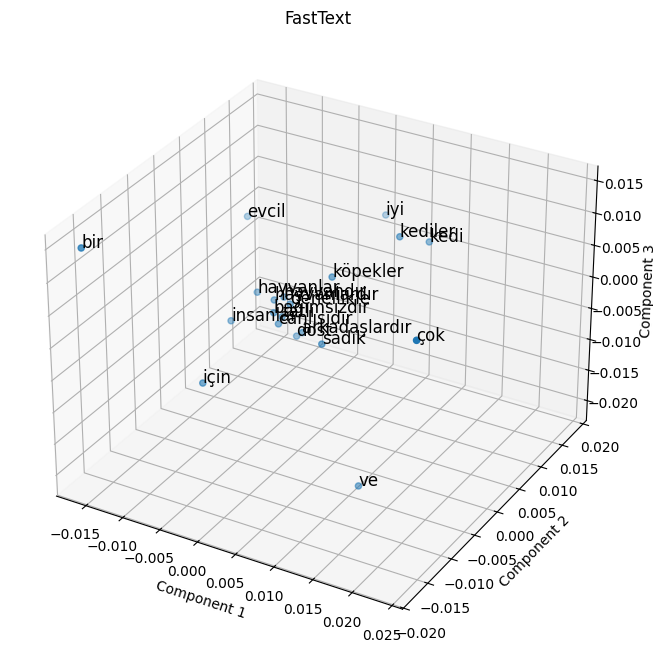

In [34]:
  

plot_word_embeddings(fasttext_model,"FastText")

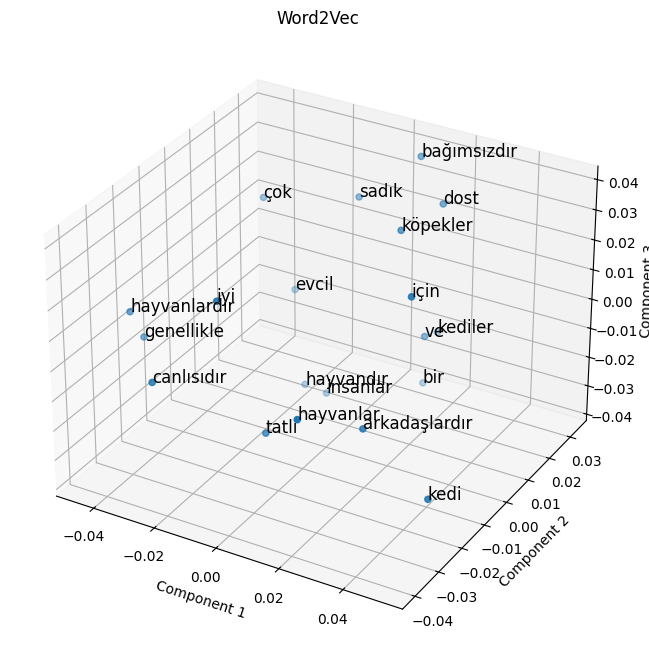

: 

In [ ]:
%matplotlib inline

plot_word_embeddings(word2vec_model,"Word2Vec")

##  Working on Real Data set please check -> https://www.kaggle.com/code/zehranurmangal/learning-word2vec

## Transformer Tabanlı Metin temsili 
- Transformers,nlp ve diğer yapay zeka alanlarında son yıllarında devrim niteliğinde yenilikler getiren bir mimaridir
- ilk olarak 2017 yılında google tarafından yayınlanmıştır.
- Neden Transformers 
    - Bağlamı daha iyi anlama
    - Paralel işleme yeteneği 
    - Çeşitli Nlp Görevlerinde kullanım 
    - Önceden  eğitilmiş modellerin yeniden kullanımı

- En Bilindik Tranformer modelleri
    - BERT - ikiyönlü -Bidirectional
    - GPT -Generative pre-trained transformer - tek yönlü 


- Attention : Modelin belirli girdi parçalarına farklı derecelerde dikkat göstermesine olanak tanır
- Özellikle bir kelimenin diğer kelimelerle olan ilişkisini anlamak için kullanılır
 - Örneğin "Kedi hızlıdr" cümlesinde "hızlıdır" kelimesi "Kedi" kelimesine olan dikkat skorlarını hesaplar:
    - Sorgu Query ve anahtar Key çarpımı : "kedi" kelimesinin "hızlıdır" kelimesi ile olan ilişki skoru hesaplanır
    - Dikkat skoru:Bu skora göre Kedi kelimesini temsilini günceller

- Input embedding : girdi verilerin modelin işleyebileceği bir formata dönüştürmek için kullanılan bir teknikt
- Kelime vektörleri :Kelimeler ,word2vec ,Glove veya Bert gibi bir embedding tekniği kullanılarak sayısal vektörlere dönüştürülür


- Multi-head attention : attention mekanizmasını birden fazla başlıkla çalıştığı bir tekniktir.
- Bir cümledeki her kelime ,diğer kelimelerle olan ilişkilerini farklı açılardan öğrenmek isteyebilir.
- Örn : "kedi" kelimesinin "hızlıdır" kelimesiyle ilişkisni anlamak için birden fazla dikkat başlığı kullanılır
     - Başlık 1:Kedi ve hızlıdır arasındaki anlam ilişkisini öğrenir
     - Başlık 2:Kedi ve Hızlıdır arasındaki gramatik ilşkiyi öğrenir
     - Başlık 2 :Kedi kelimesinin cümledi konumunu öğrenir 


- Masked Multi-head attention : modelin gelecekteki kelimeleri görmesini engeller,yani model sadece geçmiş bilgileri kullanarak tahminde bulunur.

- Add & Norm : bir katman çıktı ile giriş arasındaki kısa yolu (residual connection ) ekleyip ardından layer normalization uygulayan adımdır
- Feed-Forward Network : her encoder ve decoder katmanında bulunan bir ağdır
- Output embedding :modelin çıktısını temsil eden ve genellikle bir dil modelinde kullanılan bir tekniktir
